In [1]:
# Import libaries 

In [8]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [9]:
# Load Data Set

In [10]:
df = pd.read_csv('HRDataset_v14.csv')

In [11]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [12]:
# Clean Data 

In [13]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [14]:
df.dropna(inplace=True)

In [18]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [19]:
# Create attrition cols

In [20]:
# Using Termd Column
df['Attrition'] = df['Termd'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [21]:
# Using Employment Status
df['Attrition'] = df['EmploymentStatus'].apply(
    lambda x: 'Yes' if x != 'Active' else 'No')

In [22]:
# Basic Attrition count 

In [23]:
df['Attrition'].value_counts()

Attrition
Yes    104
Name: count, dtype: int64

In [24]:
# Attrition Percentage
df['Attrition'].value_counts(normalize=True) * 100

Attrition
Yes    100.0
Name: proportion, dtype: float64

In [27]:
# Deparment vise Attrition 
df.groupby('Department')['Attrition'].value_counts()

Department            Attrition
Admin Offices         Yes           2
IT/IS                 Yes          10
Production            Yes          83
Sales                 Yes           5
Software Engineering  Yes           4
Name: count, dtype: int64

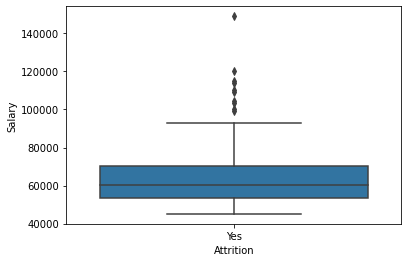

In [28]:
# Salary vise attrition 
sns.boxplot(data=df, x='Attrition', y='Salary')
plt.show()

In [29]:
# Tenure Analysis (Very Powerful Insight)
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])

df['Tenure'] = (df['DateofTermination'] - df['DateofHire']).dt.days

In [30]:
df['Tenure'] = df['Tenure'].fillna(0)

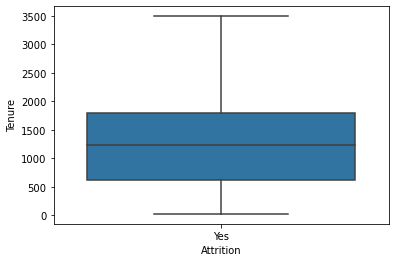

In [31]:
sns.boxplot(data=df, x='Attrition', y='Tenure')
plt.show()


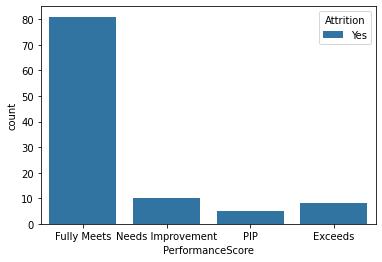

In [32]:
# Performance Score vs Attrition
sns.countplot(data=df, x='PerformanceScore', hue='Attrition')
plt.show()

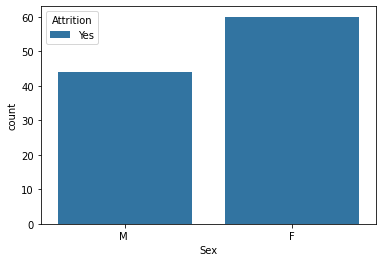

In [33]:
# Gender Attrition Analysis
sns.countplot(data=df, x='Sex', hue='Attrition')
plt.show()

In [34]:
# Save the file 
df.to_csv("hr_cleaned.csv", index=False)